Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/gdrive', force_remount=True)
# Path to Google Drive root
base_path = '/content/gdrive'

# # List contents of the mounted drive
# print("Contents of '/content/gdrive':", os.listdir(base_path))

# # Check 'MyDrive' directory
# mydrive_path = os.path.join(base_path, 'MyDrive')
# if os.path.exists(mydrive_path):
#     print("Contents of 'MyDrive':", os.listdir(mydrive_path))
# else:
#     print("'MyDrive' directory not found.")

# # Define the path to the 'upgrad AIML CNN_assignment' directory
# dataset_path = '/content/gdrive/MyDrive/upgrad AIML CNN_assignment'

# # List contents of the directory
# try:
#     contents = os.listdir(dataset_path)
#     print("Contents of 'upgrad AIML CNN_assignment':", contents)
# except FileNotFoundError as e:
#     print(f"Error: {e}")

# # Path to the 'datasets' directory
# datasets_path = '/content/gdrive/MyDrive/upgrad AIML CNN_assignment/datasets'

# # List contents of the 'datasets' directory
# datasets_contents = os.listdir(datasets_path)
# print("Contents of 'datasets':", datasets_contents)


# Path to the 'Skin_cancer_ISIC_image_collaboration' directory
dataset_path = '/content/gdrive/MyDrive/upgrad AIML CNN_assignment/datasets/Skin_cancer_ISIC_image_collaboration/Train'

# List contents of the dataset directory
dataset_contents = os.listdir(dataset_path)
print("Contents of 'Skin_cancer_ISIC_image_collaboration':", dataset_contents)

Mounted at /content/gdrive
Contents of 'Skin_cancer_ISIC_image_collaboration': ['actinic keratosis', 'melanoma', 'nevus', 'basal cell carcinoma', 'dermatofibroma', 'pigmented benign keratosis', 'seborrheic keratosis', 'vascular lesion', 'squamous cell carcinoma']


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/upgrad AIML CNN_assignment/datasets/Skin_cancer_ISIC_image_collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/upgrad AIML CNN_assignment/datasets/Skin_cancer_ISIC_image_collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
# Load training dataset with validation split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_height, img_width),  # Resize images to (180, 180)
    batch_size=batch_size,
    seed=123,  
    shuffle=True,  # Shuffle the dataset
    validation_split=0.2,  # 20% of data used for validation
    subset='training', 
    label_mode='categorical' 
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_height, img_width),  # Resize images to (180, 180)
    batch_size=batch_size,
    seed=123,  
    shuffle=True,  # Shuffle the dataset
    validation_split=0.2,  # 20% of data used for validation
    subset='validation',
    label_mode='categorical'
)

# # Load test dataset
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir_test,
#     image_size=(img_height, img_width),
#     batch_size=batch_size,
#     seed=123,
#     shuffle=False,
#     label_mode='categorical'
# )

# Print dataset details
class_names = train_ds.class_names
print(f"Class names: {class_names}")
print(f"Number of classes: {len(class_names)}")

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.
Class names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
Number of classes: 9


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

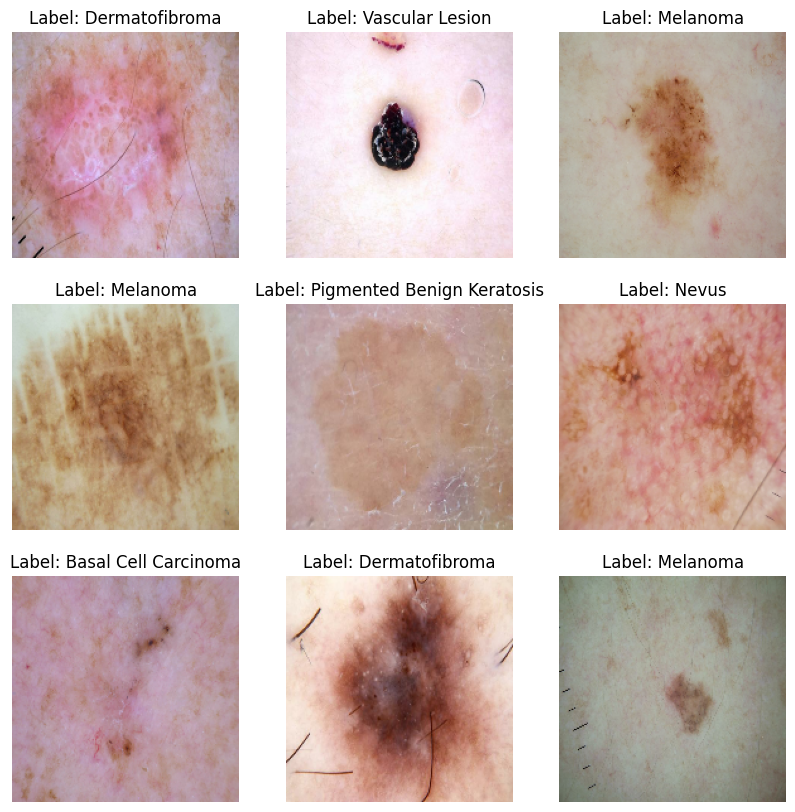

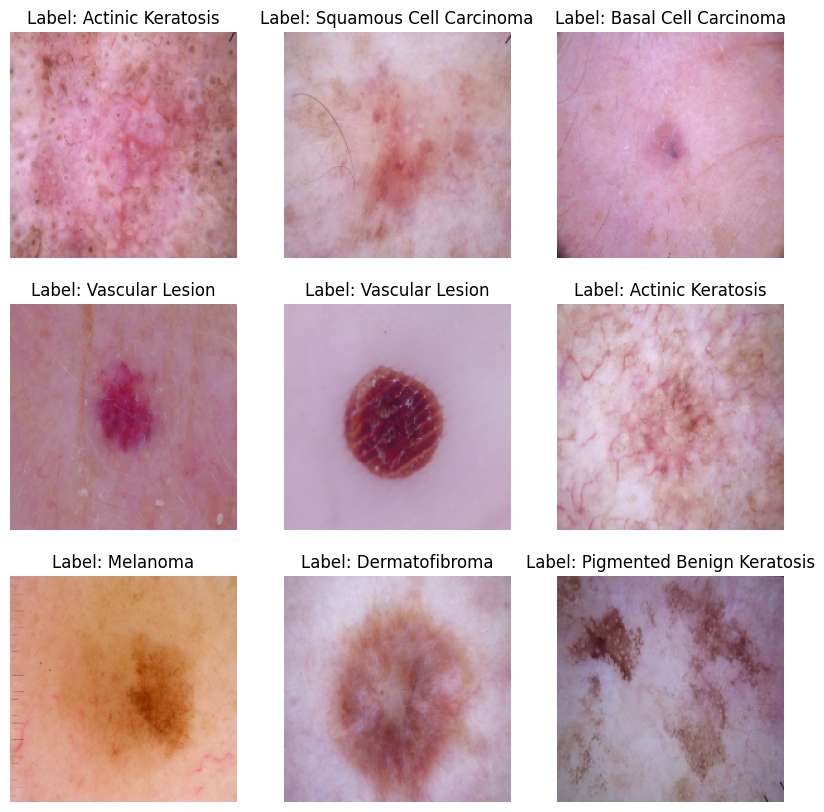

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
def plot_image_batch(dataset, num_images=9):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        # Limit the number of images to display
        images = images[:num_images]
        labels = labels[:num_images]
        for i in range(len(images)):
            plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(f"Label: {class_names[tf.argmax(labels[i])].title()}")
            plt.axis("off")
    plt.show()

plot_image_batch(train_ds)

plot_image_batch(val_ds)

:The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

:`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

> Add blockquote



`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL

import tensorflow as tf
from tensorflow.keras import layers, models

# Define paths for training, validation, and test images
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/upgrad AIML CNN_assignment/datasets/Skin_cancer_ISIC_image_collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/upgrad AIML CNN_assignment/datasets/Skin_cancer_ISIC_image_collaboration/Test')

# Set parameters
batch_size = 32
img_height = 180
img_width = 180

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123,
    shuffle=True,
    validation_split=0.2,
    subset='training',
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123,
    shuffle=True,
    validation_split=0.2,
    subset='validation',
    label_mode='categorical'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123,
    shuffle=False,
    label_mode='categorical'
)

# Optimize datasets
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Build the CNN model
model = models.Sequential([
    # Normalize pixel values to [0, 1]
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(9, activation='softmax')  # 9 output classes
])

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.
Found 118 files belonging to 9 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.0704 - loss: 2.2034
Test accuracy: 0.08


In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      10,617,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,010,377 (42.00 MB)

 Trainable params: 11,010,377 (42.00 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.2305 - loss: 1.9819

### Visualizing training results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Define the data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    RandomFlip('horizontal', input_shape=(img_height, img_width, 3)),
    RandomRotation(0.2),
    RandomZoom(0.2),
])

# Get a single image and label from the training dataset
for image, label in train_ds.take(1):
    sample_image = image[0].numpy().astype(np.uint8)
    sample_label = label[0].numpy()

# Apply the data augmentation to this sample image
augmented_images = [data_augmentation(tf.expand_dims(sample_image, 0), training=True)[0].numpy().astype(np.uint8) for _ in range(5)]

# Plot the original and augmented images
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(3, 3, 1)
plt.title('Original Image')
plt.imshow(sample_image)
plt.axis('off')

# Augmented images
for i, aug_img in enumerate(augmented_images):
    plt.subplot(3, 3, i + 2)
    plt.title(f'Augmented {i+1}')
    plt.imshow(aug_img)
    plt.axis('off')

plt.tight_layout()
plt.show()


### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model with dropout
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layer block 1
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Dropout layer added here

    # Convolutional layer block 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Dropout layer added here

    # Convolutional layer block 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),  # Dropout layer added here

    # Convolutional layer block 4
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),  # Dropout layer added here

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer added here
    layers.Dense(9, activation='softmax')  # Output layer for 9 classes
])


### Compiling the model

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

### Visualizing the results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

---



In [ ]:
## Your code goes here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Extract class labels from the dataset
# class_names = train_ds.class_names
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/upgrad AIML CNN_assignment/datasets/Skin_cancer_ISIC_image_collaboration/Train")
class_names = [d for d in os.listdir(data_dir_train) if os.path.isdir(os.path.join(data_dir_train, d))]
print(class_names)

# Get the count of samples per class
class_counts = {class_name: 0 for class_name in class_names}

# Iterate over the dataset to count samples
for images, labels in train_ds:
    # labels are one-hot encoded, so count the indices where the label is 1
    labels = np.argmax(labels.numpy(), axis=1)
    for label in labels:
        class_counts[class_names[label]] += 1

# Convert to a DataFrame for easy plotting
class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

# Print the class counts
print(class_counts_df)

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset = '/content/gdrive/MyDrive/upgrad AIML CNN_assignment/datasets/Skin_cancer_ISIC_image_collaboration/Train/'

class_names = [d for d in os.listdir(path_to_training_dataset) if os.path.isdir(os.path.join(path_to_training_dataset, d))]

import Augmentor

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
import glob
print(os.path.join(data_dir_train, '*','output', '*.jpg'))
augmented_output_path = os.path.join(data_dir_train, '*','output', '*.jpg')

pattern = os.path.join(data_dir_train, '*', 'output', '*.jpg')

path_list = glob.glob(pattern)

print(path_list)
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

# path_list = [x for x in glob.glob(augmented_output_path)]
# path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path', 'Label'])
# Define the directory containing the data
data_dir = data_dir_train
# Initialize lists to store file paths and labels
file_paths = []
labels = []

# Iterate over each subdirectory (each representing a class)
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)

    if os.path.isdir(class_dir):  # Check if it's a directory
        for file_name in os.listdir(class_dir):
            if file_name.lower().endswith(('.jpg')):  # Check for image files
                file_path = os.path.join(class_dir, file_name)
                file_paths.append(file_path)
                labels.append(class_name)

# Create a DataFrame from the lists
original_df = pd.DataFrame({
    'Path': file_paths,
    'Label': labels
})
print(original_df.head())
# new_df = original_df.append(df2)
new_df = pd.concat([original_df, df2], ignore_index=True)
print(new_df.head())

In [ ]:
new_df['Label'].value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
# data_dir_train="path to directory with training data + data created using augmentor"

original_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="training" ,
  image_size=(img_height, img_width),
  batch_size=batch_size)


augmented_path_pattern = os.path.join(data_dir_train, '*', 'output', '*.jpg')

# Define the base directory
data_dir_train = '/content/gdrive/MyDrive/upgrad AIML CNN_assignment/datasets/Skin_cancer_ISIC_image_collaboration/Train/'

# Define the pattern to match augmented images
augmented_path_pattern = os.path.join(data_dir_train, '*', 'output', '*.jpg')

# Get the list of all augmented image paths
augmented_image_paths = glob.glob(augmented_path_pattern)

# Extract class names and create a mapping
class_names = sorted([os.path.basename(d) for d in glob.glob(os.path.join(data_dir_train, '*'))])
class_name_to_index = {name: index for index, name in enumerate(class_names)}

# Create DataFrame for augmented data
augmented_df = pd.DataFrame({
    'Path': augmented_image_paths,
    'Label': [class_name_to_index[os.path.basename(os.path.dirname(os.path.dirname(p)))] for p in augmented_image_paths]
})

# Define image loading and preprocessing function
def load_and_preprocess_image(path, label):
    # Load and preprocess an image
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image = image / 255.0  # Normalize to [0, 1]
    return image, tf.cast(label, tf.int32)  # Ensure label is tf.int32

# Create TensorFlow dataset from DataFrame
def create_tf_dataset_from_df(df):
    # Create TensorFlow dataset from DataFrame
    dataset = tf.data.Dataset.from_tensor_slices((df['Path'].values, df['Label'].values))
    dataset = dataset.map(lambda path, label: load_and_preprocess_image(path, label))
    dataset = dataset.batch(batch_size)
    return dataset

# Create dataset for augmented images
augmented_ds = create_tf_dataset_from_df(augmented_df)

#### **Todo:** Create a validation dataset

In [ ]:
original_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="validation",  # For validation data
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Combine original training data with augmented data
combined_train_ds = original_train_ds.concatenate(augmented_ds)

# Shuffle and repeat the combined dataset
combined_train_ds = combined_train_ds.shuffle(buffer_size=1000).repeat()

:#### **Todo:** Create your model (make sure to include normalization)

---



*   List item
*   List item



In [ ]:
  ## your code goes here

  # Define the input image dimensions
img_height = 180
img_width = 180
num_classes = 9  # Number of output classes

# Create the model
model = models.Sequential([
    # Normalization layer to scale pixel values to [0, 1]
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers with ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output of the convolutional layers
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting

    # Output layer with softmax activation for multi-class classification
    layers.Dense(num_classes, activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of the model
model.summary()

#### **Todo:**  Train your model

In [ ]:
epochs = 30
history = model.fit(
    combined_train_ds,   # Dataset with both original and augmented data
    validation_data=original_val_ds,  # Original validation data
    epochs=epochs
)

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

